# Investigate a dataset project
## Introduction
This project is my implementation of the "Investigate a dataset" project. This is the second project of the Data Analyst nanodegree program of Udacity. The dataset I selected is the "No-show appointments dataset". This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.The question I want to answer is

## Question. What are the most important factors in determing the likelyhood of a no-show?
I start with loading the dataset and the python libraries I need. Then I clean up the data where needed. I will go over most of the variables in the dataset to investigate the influence of theses variables on the noshow percentage. 

## Loading the data and libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## A first look at the quality of the data
First we will take a look at the quality of the data using the same steps as in "Lesson 3: The data analysis proces".

In [5]:
# this returns the datatypes of the columns
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [6]:
# this displays a concise summary of the dataframe,
# including the number of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


All columns have 110527 non-null values which is equal to the total number of rows so we have no nulls anywhere. 

In [7]:
# this returns the number of unique values in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [8]:
#List unique values in the df['name'] column
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

There are some old people here, up to 115 years. There is also the value -1. A fetus? Age unknown? This is a nonsensical value.

In [9]:
df = df.drop(df.index[df.Age == -1])
df.shape

(110526, 14)

One row with Age == -1 is removed. 



### What is the overall no-show percentage?
Before looking at the the influence of different variables on the no-show percentage we need to know the overall no-show percentage.

In [10]:
total = len(df.index)
print('Total = ', total)
total_noshow = (df['No-show'] == 'Yes').sum()
print('General no-show = ', int((total_noshow / total) * 100), '%')

Total =  110526
General no-show =  20 %


The overall no-show percentage is 20 % and we have a total of 110526 records.

### What is the influence of gender on the no-show percentage?

In [11]:
# this function prints a 1d analysis of a variable
def print_1d_analysis(column_name, value, specific_text):
    total = len(df.index)
    total_value = (df[column_name] == value).sum()
    percent = int((total_value / total) * 100)
    text = ' This is ' + str(percent) + '% of ' + str(total) + ' records.'
    print(str(total_value) + ' ' + specific_text + text)
    
print_1d_analysis('Gender', 'M', 'of the appointments is for a man.')
print_1d_analysis('Gender', 'F', 'of the appointments is for a woman.')

38687 of the appointments is for a man. This is 35% of 110526 records.
71839 of the appointments is for a woman. This is 64% of 110526 records.


In [12]:
def print_noshow_percentage(column_name, value, percentage_text):
    total = (df[column_name] == value).sum()
    noshow = len((df[(df[column_name] == value) & (df['No-show'] == 'Yes')]))
    print(int((noshow / total) * 100), percentage_text)

In [13]:
#Gender
print_noshow_percentage('Gender', 'M', '% of all appointments with a man is a no show')
print_noshow_percentage('Gender', 'F', '% of all appointments with a woman is a no show')


19 % of all appointments with a man is a no show
20 % of all appointments with a woman is a no show


Apparently gender is not an important factor. The distribution is clearely skewed towards women 64% vs 35%. However as the no-show percentage under man and woman is almost equal this will have little effect on the overal study.

### What is the influence of hipertension, diabetes and alcoholism on the no-show percentage? 

In [14]:
print_1d_analysis('Hipertension', 1, 'of the appointments involves a patient with hipertension.')
print_1d_analysis('Diabetes', 1, 'of the appointments involves a patient with diabetes.')
print_1d_analysis('Alcoholism', 1, 'of the appointments involves a patient with alcoholism.')

21801 of the appointments involves a patient with hipertension. This is 19% of 110526 records.
7943 of the appointments involves a patient with diabetes. This is 7% of 110526 records.
3360 of the appointments involves a patient with alcoholism. This is 3% of 110526 records.


In [15]:
print_noshow_percentage('Hipertension', 1, '% of all appointments with someone with hipertension is a no show')
print_noshow_percentage('Diabetes', 1, '% of all appointments with someone with diabetes is a no show')
print_noshow_percentage('Alcoholism', 1, '% of all appointments with someone with alcoholism is a no show')

17 % of all appointments with someone with hipertension is a no show
18 % of all appointments with someone with diabetes is a no show
20 % of all appointments with someone with alcoholism is a no show


Alcoholism is not a factor in the no-show percentage. The no-show percentage for patients with hipertension or diabetes is significantly lower. 
I want to look deeper in this.

In [16]:
# first make a function that prints the no show percetage of a variable given that another variable has a certain value
def print_noshow_percentage_given(column_name, value, given_column, given_value):
    total = ((df[column_name] == value) & (df[given_column] == given_value)).sum()
    noshow = len(df[((df[column_name] == value) & (df[given_column] == given_value) & (df['No-show'] == 'Yes'))])
    percentage = int((noshow / total) * 100)
    text = str(percentage) + '% of all appontments for patients with ' + column_name + ' = ' + str(value)
    text = text + ' and ' + given_column + ' = ' + str(given_value) + ' is a no-show'
    print(text)

print_noshow_percentage_given('Hipertension', 1, 'Alcoholism', 1 )   
print_noshow_percentage_given('Hipertension', 1, 'Alcoholism', 0 )
print_noshow_percentage_given('Diabetes', 1, 'Alcoholism', 1 )   
print_noshow_percentage_given('Diabetes', 1, 'Alcoholism', 0 )

18% of all appontments for patients with Hipertension = 1 and Alcoholism = 1 is a no-show
17% of all appontments for patients with Hipertension = 1 and Alcoholism = 0 is a no-show
17% of all appontments for patients with Diabetes = 1 and Alcoholism = 1 is a no-show
18% of all appontments for patients with Diabetes = 1 and Alcoholism = 0 is a no-show


The results on alcoholism on no-show percentage is inconclusive. Among patients with hipertension alcoholism slightly increases the no-show percentage, among patients with diabetes alcoholism slightly lowers it.
### Are people who received an SMS more likely to show up?

In [17]:
print_1d_analysis('SMS_received', 1, 'of the appointments involves a patient who received an SMS.')
print_noshow_percentage('SMS_received', 1, '% of all appointments with someone who received an SMS is a no show')

35482 of the appointments involves a patient who received an SMS. This is 32% of 110526 records.
27 % of all appointments with someone who received an SMS is a no show


Yikes!! That is 27% of no-shows under people who received an SMS. As there is no information available on why some patients get an SMS and others not, it is not possible to give an explanation.  

### Clean up
In order to make the dataset less unwieldy drop some columns we no longer need

In [18]:
df.drop('Scholarship', axis=1, inplace=True)
df.drop('Hipertension', axis=1, inplace=True)
df.drop('Diabetes', axis=1, inplace=True)
df.drop('Alcoholism', axis=1, inplace=True)
df.drop('Handcap', axis=1, inplace=True)
df.drop('SMS_received', axis=1, inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,No


In [19]:
#It is easier to calculate with 1 and 0 than yes and no
df['No-show_Binary'] = df['No-show'].replace(('Yes', 'No'), (1.0, 0.0))
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,No-show,No-show_Binary
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,No,0.0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,No,0.0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,No,0.0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,No,0.0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,No,0.0


### De influence of age
First we are going to group ages togetther in bins of 5 years. 
Then we plot the no-show percentage as a function of these age-bins.

In [20]:
#Creating the age-bins
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120]
df['Agebins'] = pd.cut(df['Age'], bins)
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,No-show,No-show_Binary,Agebins
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,No,0.0,"(60, 65]"
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,No,0.0,"(55, 60]"
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,No,0.0,"(60, 65]"
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,No,0.0,"(5, 10]"
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,No,0.0,"(55, 60]"


Text(0.5,0,'Patient age (in 5 year bins)')

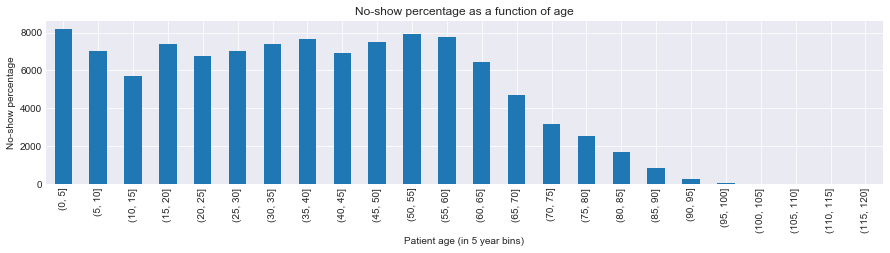

In [21]:
df_age = df[['No-show_Binary', 'Agebins']].groupby('Agebins').count()
# df_age.head(23)
plot_title = 'No-show percentage as a function of age'
ax = df_age['No-show_Binary'].plot(kind='bar', figsize=(15, 3), title=plot_title)
ax.set_ylabel('No-show percentage')
ax.set_xlabel('Patient age (in 5 year bins)')

Due to the sample size we can ignore ages of 90 and above.

Text(0.5,1,'Distribution of Age')

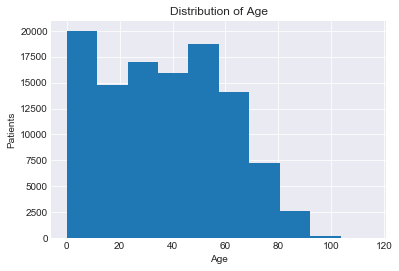

In [49]:
plt.figure();
age_hist = df['Age'].plot.hist(bins=10)
age_hist.set_xlabel("Age")
age_hist.set_ylabel("Patients")
age_hist.set_title('Distribution of Age')

In [70]:
#Most of the patients are in the age of 0-10 an 50-60, after the age of 70, there is huge decrease in no. of patients.

Text(0.5,1,'Distribution of Days delta')

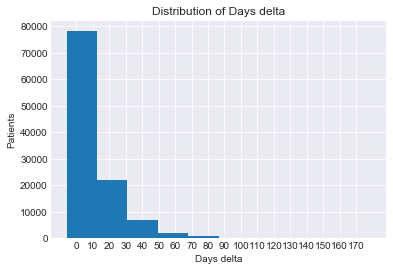

In [52]:
dt_scheduledDay =  pd.to_datetime(df.ScheduledDay).dt.date
dt_appointmentDay = pd.to_datetime(df.AppointmentDay).dt.date

# Storing "delta_days" to df as a new feature
df['days_delta'] = (dt_appointmentDay - dt_scheduledDay).dt.days
df.head()
days_hist = df['days_delta'].plot.hist(bins=10)
days_hist.set_xlabel("Days delta")
days_hist.set_xticks(range(0, 180, 10))
days_hist.set_ylabel("Patients")
days_hist.set_title('Distribution of Days delta')

In [68]:
#Most of the patients have a delay of at most 10 days to recieve treatment, 
#but very few patients were delayed after that.

In [54]:
df_age = df
df_age = df_age.drop(df_age.index[df_age.Age > 90])
df_age.drop('Agebins', axis=1, inplace=True)
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]
df_age['Agebins'] = pd.cut(df_age['Age'], bins)

Text(0.5,0,'Patient age (in 5 year bins)')

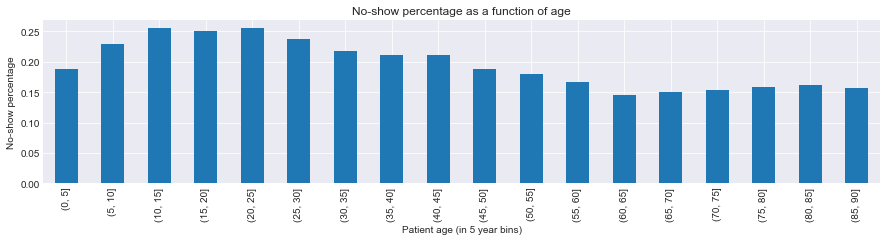

In [55]:
# making the plot
df_age = df_age[['No-show_Binary', 'Agebins']].groupby('Agebins').mean()
plot_title = 'No-show percentage as a function of age'
ax = df_age['No-show_Binary'].plot(kind='bar', figsize=(15, 3), title=plot_title)
ax.set_ylabel('No-show percentage')
ax.set_xlabel('Patient age (in 5 year bins)')

The no-show percentage is increasing with age for young children. The peak is reached with the 10-15 bin. It then stays constant for 15 years after which the no-show percentage slowly declines until a minimum is reached at the ages of 60 - 65. Then it it remains relatively constant for 20 years.

### What is the influence of the neighbourhood and the no-show percentage?

In [24]:
# Look at the sample size difference in some neighbourhoods to get an idea
df_neighbourhood = df[['No-show_Binary', 'Neighbourhood']].groupby('Neighbourhood')['No-show_Binary'].count()
df_neighbourhood.head(40)

Neighbourhood
AEROPORTO                         8
ANDORINHAS                     2262
ANTÔNIO HONÓRIO                 271
ARIOVALDO FAVALESSA             282
BARRO VERMELHO                  423
BELA VISTA                     1907
BENTO FERREIRA                  858
BOA VISTA                       312
BONFIM                         2773
CARATOÍRA                      2565
CENTRO                         3334
COMDUSA                         310
CONQUISTA                       849
CONSOLAÇÃO                     1376
CRUZAMENTO                     1398
DA PENHA                       2217
DE LOURDES                      305
DO CABRAL                       560
DO MOSCOSO                      413
DO QUADRO                       849
ENSEADA DO SUÁ                  235
ESTRELINHA                      538
FONTE GRANDE                    682
FORTE SÃO JOÃO                 1889
FRADINHOS                       258
GOIABEIRAS                      700
GRANDE VITÓRIA                 1071
GURIGICA      

In [36]:
# Lets first filter out all neighborhoods with a low sample count. I set the threshold on 10 
threshold = 10
df_nb = df[['No-show_Binary', 'Neighbourhood']].groupby('Neighbourhood').filter(lambda x: len(x) > threshold)
# groupby neighbourhood and calculate the mean
df_nb = df_nb.groupby('Neighbourhood').mean()
#sort
df_nb_sorted = df_nb.reset_index().sort_values('No-show_Binary', ascending=True).set_index(['Neighbourhood'])
df_nb_sorted.head(10)

,No-show_Binary
Neighbourhood,
ILHA DO BOI,0.085714
MÁRIO CYPRESTE,0.145553
SOLON BORGES,0.147122
DE LOURDES,0.154098
DO CABRAL,0.157143
SANTA MARTHA,0.158416
JARDIM DA PENHA,0.162755
DO QUADRO,0.164900
VILA RUBIM,0.165687


Text(0,0.5,'No-show percentage')

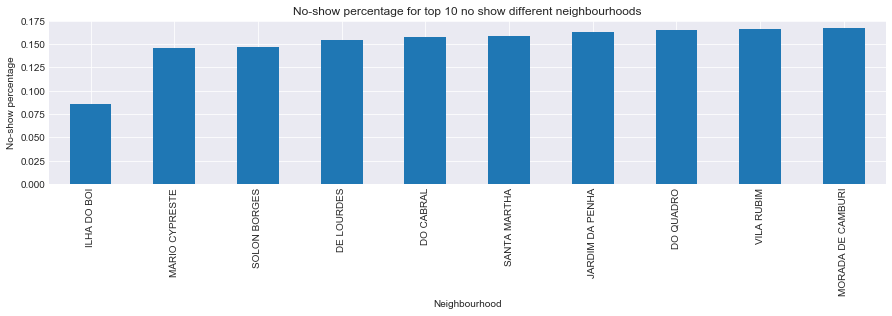

In [58]:
# Now we can make a plot of the top 10 neighborhoods with no show
plot_title = 'No-show percentage for top 10 no show different neighbourhoods'
ax = df_nb_sorted['No-show_Binary'][:10].plot(kind='bar', figsize=(15, 3), title=plot_title)
ax.set_ylabel('No-show percentage')

There is a large correlation between neighbourhood and no-show percentage
### What is the influence of the days between the scheduled date and the appointed date on the no-show percentage?

Text(0,0.5,'No-show percentage')

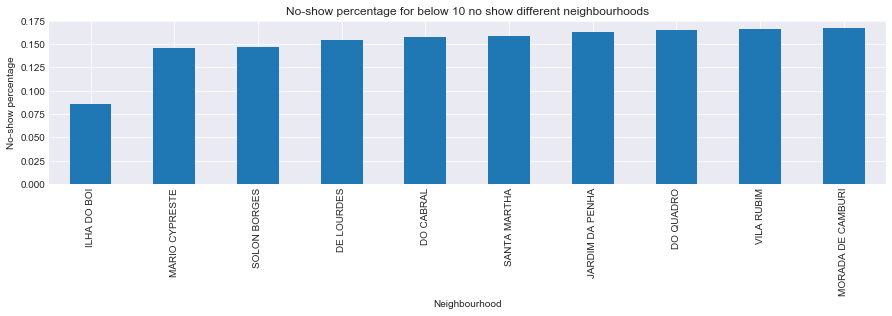

In [67]:
# Now we can make a plot of the below 10 neighborhoods with no show
plot_title = 'No-show percentage for below 10 no show different neighbourhoods'
ax = df_nb_sorted['No-show_Binary'][0:10].plot(kind='bar', figsize=(15, 3), title=plot_title)
ax.set_ylabel('No-show percentage')

In [27]:
#First drop the time part
df['ScheduledDay'] = df['ScheduledDay'].str.slice(start=0, stop=10)
df['AppointmentDay'] = df['AppointmentDay'].str.slice(start=0, stop=10)

#convert to datetime and subtract to get the days between schedule and appointment
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['DaysBetween'] = df['AppointmentDay'] - df['ScheduledDay']
df['DaysBetween'] = df['DaysBetween'].dt.days

#group by days between
df_daysbetween = df[['No-show_Binary', 'DaysBetween']].groupby('DaysBetween').mean()
df_daysbetween.head()

,No-show_Binary
DaysBetween,
-6,1.000000
-1,1.000000
0,0.046471
1,0.213505
2,0.238216


Text(0.5,0,'Days between scheduling and appointment')

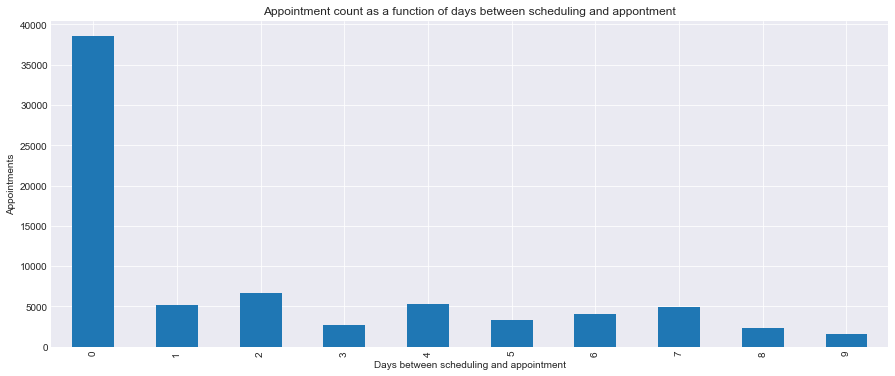

In [85]:
# Uhm negative days? Clearly I missed something during the initial data cleaning phase. 

df_daysbetween = df.drop(df.index[df.DaysBetween < 0])
df_daysbetween = df_daysbetween[['No-show_Binary', 'DaysBetween']].groupby('DaysBetween').count()
plot_title = 'Appointment count as a function of days between scheduling and appontment'

ax = df_daysbetween['No-show_Binary'][0:10].plot(kind='bar', figsize=(15, 6), title=plot_title,)
ax.set_ylabel('Appointments')
ax.set_xlabel('Days between scheduling and appointment')

Although the 0 day (appointment scheduled on the day of the scheduling) peak is obvious I am now more interested in the tail. A few things to notice.
1. The appointment count decreases rapidly with an increasing number of days between scheduling and appointment.
2. There is an interesting 7 day (weekly) cylcle in the counts

I decided to ignore anything larger as 4 weeks.

Text(0.5,0,'Days between scheduling and appointment')

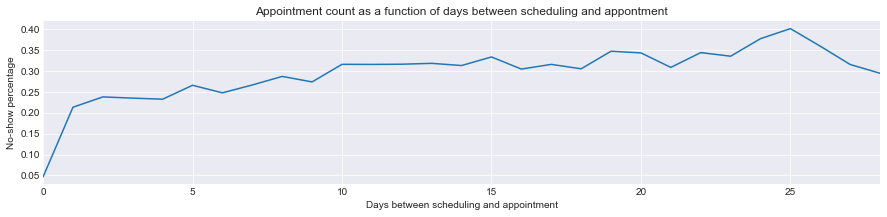

In [29]:
df_daysbetween = df.drop(df.index[df.DaysBetween < 0])
df_daysbetween = df_daysbetween.drop(df_daysbetween.index[df_daysbetween.DaysBetween > 28])
df_daysbetween = df_daysbetween[['No-show_Binary', 'DaysBetween']].groupby('DaysBetween').mean()
ax = df_daysbetween['No-show_Binary'].plot(kind='line', figsize=(15, 3), title=plot_title)
ax.set_ylabel('No-show percentage')
ax.set_xlabel('Days between scheduling and appointment')

We see a large difference here. If the appointment is scheduled on the day of the appointment there is hardly any no-show.Then the no-show percentage increases rapidly. For more than 10 days the no-show percentage is more than 30%.

### What is the influence of the day of the week on the no-show percentage?


In [30]:
df['DayOfWeekIndex'] = df['AppointmentDay'].dt.dayofweek
df_dayofweek = df[['No-show_Binary', 'DayOfWeekIndex']].groupby('DayOfWeekIndex').mean()
df_dayofweek.head(7)

,No-show_Binary
DayOfWeekIndex,
0,0.206481
1,0.200936
2,0.196892
3,0.193541
4,0.212261
5,0.230769


Monday = 0, Tuesday = 1 and so on. We see that there are no appointments on sunday.
we convert the DayOfWeekIndex numbers to day names for readability and make a plot.

Text(0.5,0,'Day of the week')

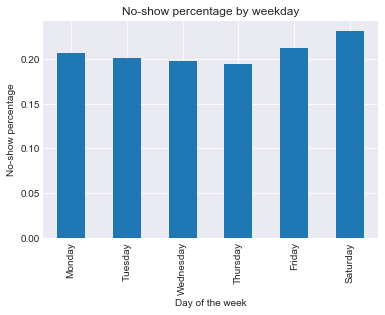

In [31]:
df_dayofweek.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plot_title = 'No-show percentage by weekday'
ax = df_dayofweek['No-show_Binary'].plot(kind='bar', title=plot_title)
ax.set_ylabel('No-show percentage')
ax.set_xlabel('Day of the week')

We see a somewhat higher incidence of no-shows on Friday and a significant higher incidence of no-shows on Saturday.

## Summary
The main question was What are the most important factors in determing the likelyhood of a no-show?
The most important factors were:
1. The time between the scheduled and appointment date. Patients are a lot more likely to show up when the appointment is scheduled on the same day.
2. The Neighbourhood. This varied from 9% for ILHA DO BOI up to 29% for SANTOS DUMONT.
3. SMS received. Patients who received an SMS had a no-show percentage of 27% vs 20% overall.

Smaller effects were found for the day of the week, age of the patient hipertension and diabetes.

There is no statistical analysis in this study therefore this analysis gives correlations and makes no attempt to suggest causality.

For further studies it would be interesting to know the average travel time for a patient to get to the clinic in each neighbourhood as the Neighbourhood had such a large influence on the no-show percentage.

A further limitation is that some variabeles werejust reprecented in a 1 or a 0. For example 27% of patients who received an SMS is a no-show vs 20% overall. In 32% of the appointments the patient received an SMS. It would be interesting to know why these patients received an SMS. If these patients had habit of not showing up in previous appointments it would explain why the no-show percentage is so much higher for SMS receivers. But all we have is 1 or 0. 

The distribution is clearely skewed towards women 64% vs 35%. However as the no-show percentage under man and woman is almost equal this will have little effect on the overal study.